# SVM and metrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#from sklearn.
#import 

In [37]:
df = pd.read_csv("/media/radial/Work/BDAP/Assignments/Term 3/ML_Patil/ToyotaCorolla.csv")

In [38]:
df.head()

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170

In [39]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

#  CORRELATIOn

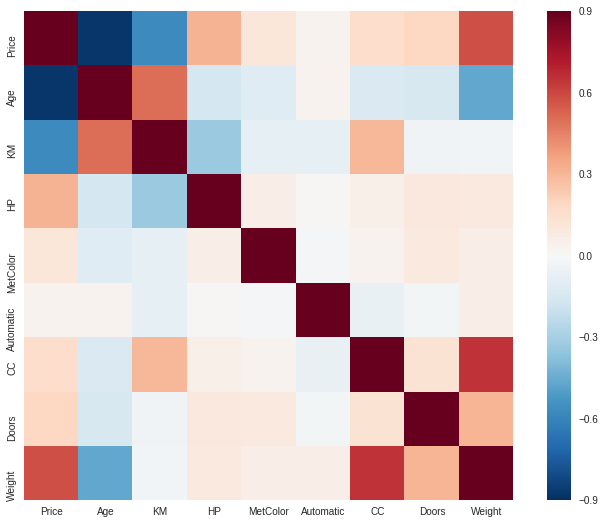

In [40]:
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.9, square=True)

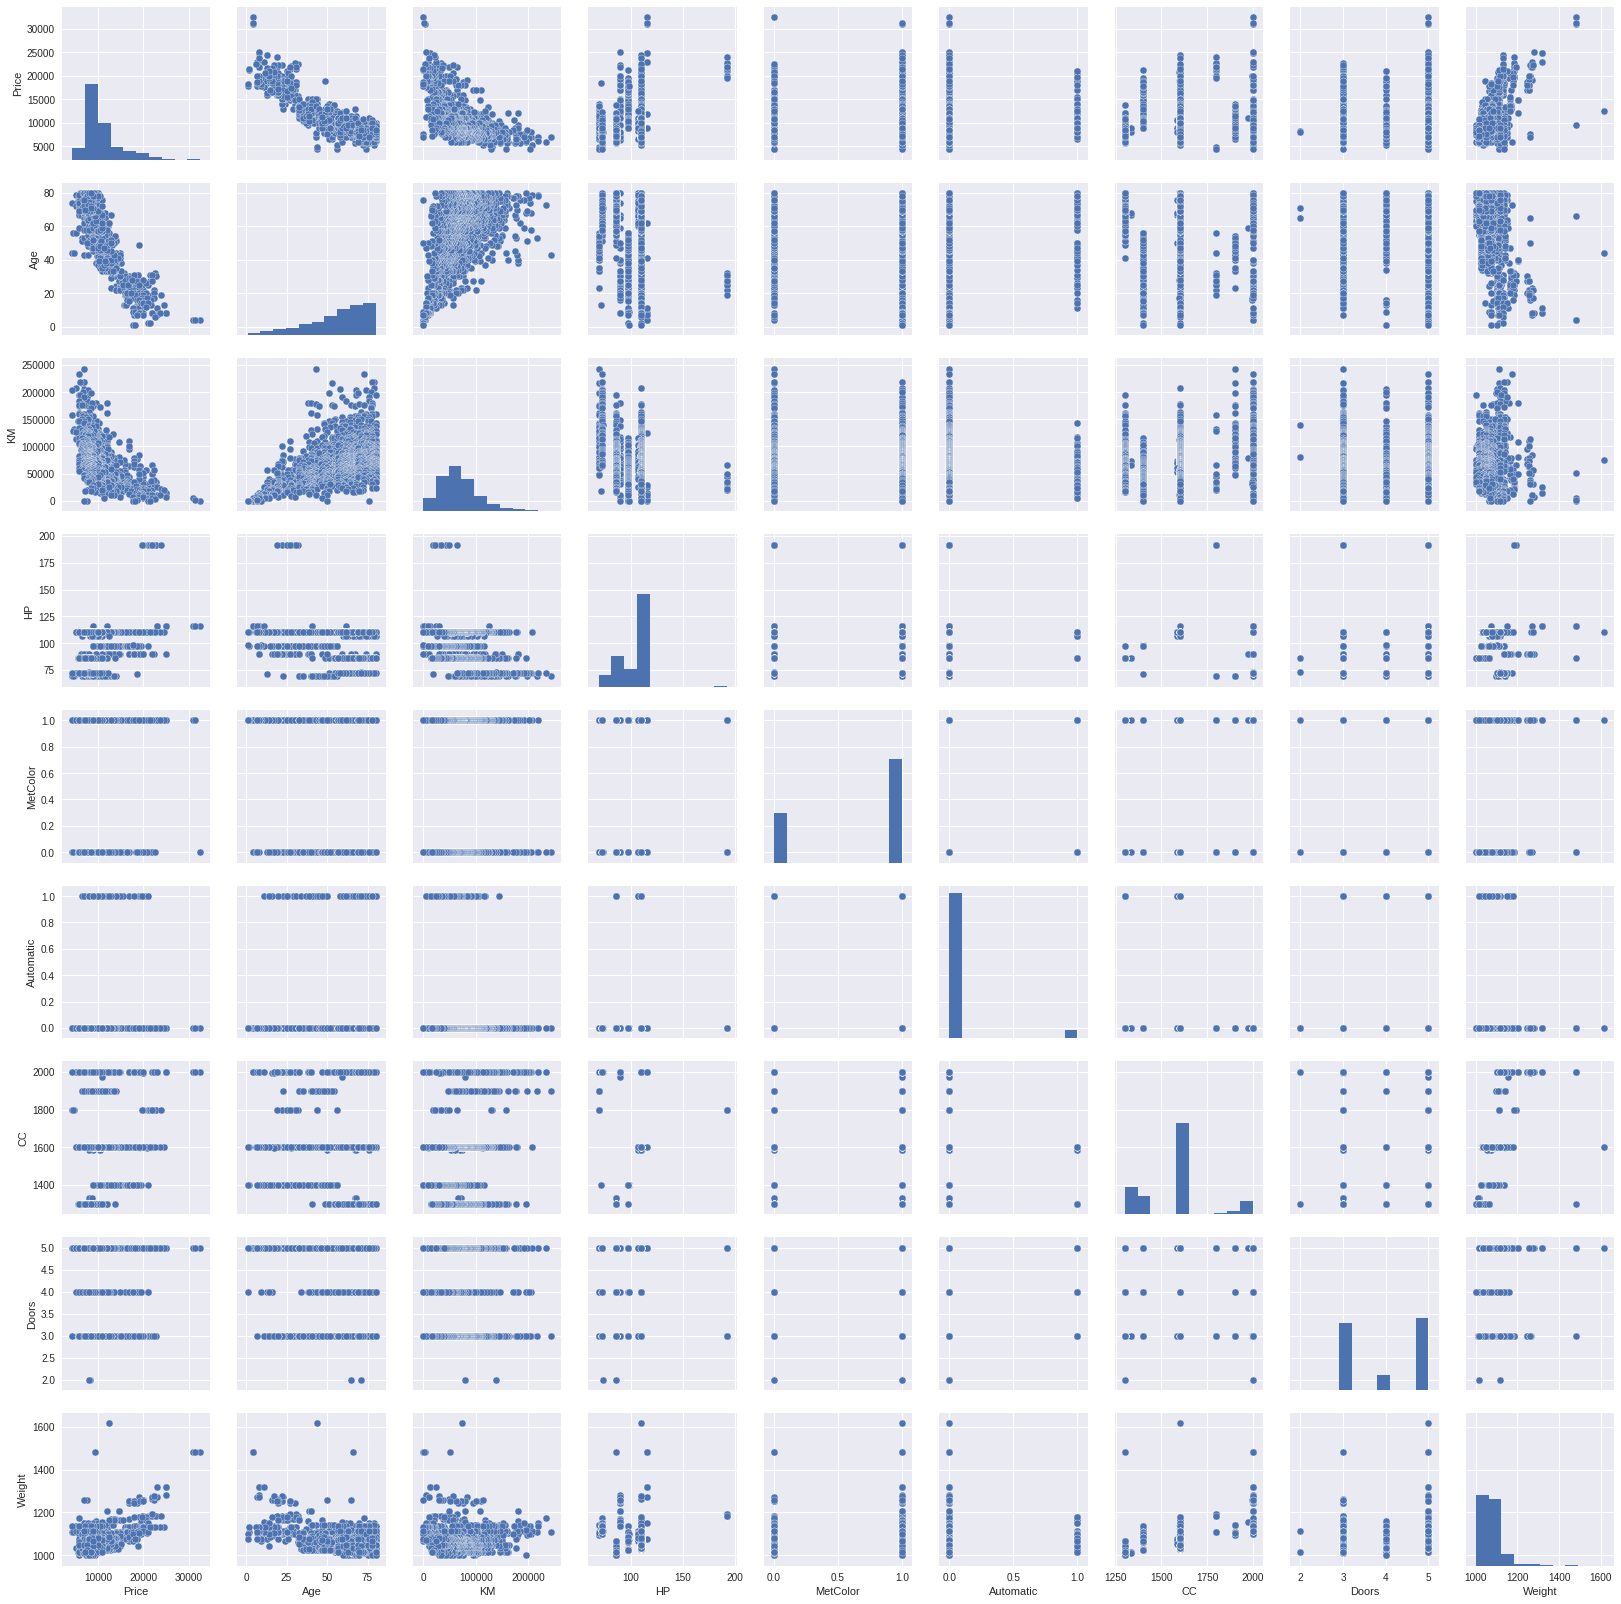

In [41]:
sns.pairplot(df[['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight']]);

In [42]:
df.corr()

Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081   
Age       -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM        -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP         0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor   0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic  0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC         0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors      0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight     0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   

                 CC     Doors    Weight  
Price      0.165067  0.185326  0.581198  
Age       -0.133182 -0.148359 -0.470253  
KM         0.302150 -0.036197 -0.028598  
HP         0.050884  0.092424  0.089614  
MetColor   0.034921  0.085243  0.057929  
Automatic -0.069321 -0.027654  0.057249  
CC         1.000000  0.126768  0.651450  
Doors      0.126768  1.000000  0.302618  
Weight     0.651450  0.302618  1.000000

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [44]:
x = pd.DataFrame(pd.get_dummies(df.FuelType))

In [45]:
import copy

In [46]:
dx = copy.deepcopy(df)
dx["Petrol"] = x.Petrol
dx["Diesel"] = x.Diesel
dx["CNG"] = x.CNG

dx.head()

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   Petrol  Diesel  CNG  
0       0       1    0  
1       0       1    0  
2       0       1    0  
3       0       1    0  
4       0       1    0

In [48]:
df.FuelType.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [72]:
df.groupby("FuelType").count()["CC"]

FuelType
CNG         17
Diesel     155
Petrol    1264
Name: CC, dtype: int64

In [84]:
x = df["FuelType"].map({"Diesel":1,"Petrol":2,"CNG":3})
df.FuelType = x
df.head()

Price  Age     KM  FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986         1  90         1          0  2000      3    1165
1  13750   23  72937         1  90         1          0  2000      3    1165
2  13950   24  41711         1  90         1          0  2000      3    1165
3  14950   26  48000         1  90         0          0  2000      3    1165
4  13750   30  38500         1  90         0          0  2000      3    1170

In [87]:
dd = df[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'FuelType','Weight']]
dd.head()

Price  Age     KM  HP  MetColor  Automatic    CC  FuelType  Weight
0  13500   23  46986  90         1          0  2000         1    1165
1  13750   23  72937  90         1          0  2000         1    1165
2  13950   24  41711  90         1          0  2000         1    1165
3  14950   26  48000  90         0          0  2000         1    1165
4  13750   30  38500  90         0          0  2000         1    1170

In [88]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dd,df.Doors, test_size=400, random_state=101)

In [89]:
from sklearn.svm import SVC

In [15]:
?SVC()

In [90]:
model_1 = SVC(C = 2, kernel="linear", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)

[LibSVM]SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)


In [91]:
pred_1=model_1.predict(x_test)

In [95]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, pred_1))

[[  0   0   0   1]
 [  0 125   7  46]
 [  0  16   5   9]
 [  0  43   1 147]]


In [96]:
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))

In [97]:
met

0    1  2    3
0  0    0  0    1
1  0  125  7   46
2  0   16  5    9
3  0   43  1  147

In [99]:
s = 0
for i in range(4):
    for j in range(4):
        s = s+met[i][j]
s

400

In [100]:
ac = 0
for i in range(4):
        ac = ac+met[i][i]
ac

277

In [102]:
accuracy = ac/s*100
accuracy

69.25

In [ ]:
model_2 = SVC(C = 1, kernel="poly",random_state=101)
model_2.fit(x_train, y_train)
print(model_2)

In [109]:
pred_2=model_2.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_2))

[[  0   0   0   1]
 [  0   2   0 176]
 [  0   0   0  30]
 [  0   0   0 191]]
